In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd/content/drive/MyDrive/Topic modelling

/content/drive/MyDrive/Topic modelling


In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
!pip install gensim  ## Install gensim for topic modelling 

In [5]:
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt

In [6]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer 
from nltk.tokenize.casual import casual_tokenize
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.manifold import TSNE

In [8]:
df1 = pd.read_csv('uniquedata1.csv', low_memory=False)
df2 = pd.read_csv('uniquedata2.csv', low_memory=False)
df3 = pd.read_csv('unique3.csv', lineterminator='\n', low_memory=False)

In [9]:
df = pd.concat([df1, df2, df3], ignore_index=True)

In [10]:
df.hashtags = df.hashtags.map(lambda x: eval(x))\
.map(lambda x: ['#' + tag for tag in x])

In [11]:
english = df[df.language == 'en'].sample(n = 22907, random_state=10)
russian = df[df.language == 'ru'].sample(n = 22907, random_state=10)
ukrain = df[df.language == 'uk']

In [12]:
tweets_eng = english[['tweet', 'hashtags']].reset_index(drop = True)
tweets_ru = russian[['tweet', 'hashtags']].reset_index(drop = True)
tweets_uk = ukrain[['tweet', 'hashtags']].reset_index(drop = True)

In [13]:
before_cleaning = tweets_eng.copy()

## Data Cleaning Round 1

In [14]:

'''Remove all links, all @s, convert to lower case, remove all hashtags'''

tweets_eng.tweet = tweets_eng.tweet.map(lambda x: re.sub(r"http\S+", '', x))\
.map(lambda x: re.sub(r"@\S+", '', x))\
.map(lambda x: x.lower())

tweets_eng['tweet'] = tweets_eng.apply(lambda x: [word for word in x['tweet'].split() if word not in x['hashtags']], axis =1)\
.map(lambda x: ' '.join(x))

tweets_eng = tweets_eng.drop(columns = ['hashtags'])


'''remove words containing numbers, remove words starting with underscore, and nonenglish characters'''

tweets_eng.tweet = tweets_eng.tweet.map(lambda word: re.sub('\w*\d\w*', '', word))\
.map(lambda word: re.sub(r"_\S+", '', word))\
.map(lambda word: re.sub('[^a-zA-Z ]+', '', word))

## More aggresive tokenization because of social media data

In [15]:
import spacy
!pip install spacytextblob

In [16]:
!pip install spacytextblob
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 14.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [17]:
!pip install spacy


In [18]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 35.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [19]:
!pip install -U pip setuptools wheel
!pip install -U spacy
import spacy

In [20]:
nlp=spacy.load('en_core_web_sm')


In [21]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
tweets_eng.tweet = tweets_eng.tweet.map(lambda message: casual_tokenize(message, reduce_len=True, strip_handles=True))\
.map(lambda message: ' '.join(message))

In [23]:
def lemmatizer(text):
    return ' '.join([word.lemma_ for word in nlp(text)])

In [24]:
tweets_eng.tweet=tweets_eng.tweet.apply(lemmatizer)

In [25]:
for j in range(5):
    print('Before Cleaning:')
    print(before_cleaning.tweet[j])
    print(' ')
    print('After Cleaning:')
    print(tweets_eng.tweet[j])
    print(' ')

Before Cleaning:
Ukraine War: Civilians abducted as Russia tries to assert control  https://t.co/ZZG90JzPwC
 
After Cleaning:
ukraine war civilian abduct as russia try to assert control
 
Before Cleaning:
McDonald’s said Tuesday it is temporarily closing all of its 850 restaurants in Russia in response to the country's invasion of Ukraine. #RussianUkrainianWar #Russia #UkraineRussiaWar
 
After Cleaning:
mcdonald say tuesday it be temporarily close all of its restaurant in russia in response to the countrys invasion of ukraine
 
Before Cleaning:
@brianlilley No one has b@lls to stand up to Putin @JustinTrudeau @POTUS @JoeBiden #cdnpoli #RussianUkrainianWar
 
After Cleaning:
no one have b to stand up to putin
 
Before Cleaning:
@TruthRuththe @MEGAMANTROTSKY @DukeJeopardy @RealFacelessMan @aaronjmate @JobyWarrick BLM has to do with black civil rights. Nothing to do with immigration. And if you are a supporter of BLM then how can you defend Putin's talking points while supporting a group h

In [26]:
## remove stopwords

In [27]:
stop_words=stopwords.words('english')
stop_words.extend(['putin', 'ukraine', 'russia', 'zelensky', 'russian', 'ukrainian'])

In [28]:
cv=CountVectorizer(stop_words=stop_words,min_df=20)
dataCV=cv.fit_transform(tweets_eng.tweet)
dataCV_df=pd.DataFrame(dataCV.toarray(), columns=cv.get_feature_names())

In [29]:
new_df=dataCV_df.sum().sort_values(ascending=False)

In [30]:
top15=new_df[:15]

In [31]:
top15

war          4407
say          2378
people       2145
biden        1887
amp          1742
go           1612
like         1598
would        1465
get          1406
world        1355
think        1330
president    1280
want         1229
one          1224
country      1217
dtype: int64

In [32]:
top15.values

array([4407, 2378, 2145, 1887, 1742, 1612, 1598, 1465, 1406, 1355, 1330,
       1280, 1229, 1224, 1217])

In [33]:
top15.head(10)

war       4407
say       2378
people    2145
biden     1887
amp       1742
go        1612
like      1598
would     1465
get       1406
world     1355
dtype: int64

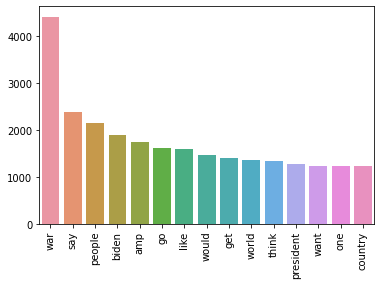

In [34]:
sns.barplot(y=top15.values, x=top15.index)
plt.xticks(rotation=90)
plt.show()

In [35]:
def sent_to_words(sentences):
    for s in sentences:
        yield(simple_preprocess(str(s), deacc=True))

In [36]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [37]:
data=tweets_eng.tweet.values.tolist()
tweet_word=list(sent_to_words(data))

In [38]:
## remove stopwords

tweet_word=remove_stopwords(tweet_word)

In [39]:
import gensim.corpora as corpora

In [40]:
id2word=corpora.Dictionary(tweet_word)

texts=tweet_word

In [41]:
## create corpus

corpus=[id2word.doc2bow(text) for text in texts]

In [42]:
from pprint import pprint

In [43]:
lda_model=gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=10, random_state=42)

In [44]:
## print keywords in the topics

In [45]:
pprint(lda_model.print_topics())

[(0,
  '0.016*"like" + 0.013*"war" + 0.011*"say" + 0.008*"take" + 0.007*"want" + '
  '0.007*"good" + 0.007*"would" + 0.006*"know" + 0.006*"time" + 0.006*"make"'),
 (1,
  '0.008*"war" + 0.007*"get" + 0.006*"year" + 0.006*"go" + 0.006*"would" + '
  '0.006*"sanction" + 0.006*"people" + 0.006*"need" + 0.005*"like" + '
  '0.005*"party"'),
 (2,
  '0.017*"amp" + 0.010*"like" + 0.009*"know" + 0.008*"go" + 0.008*"nato" + '
  '0.008*"want" + 0.007*"trump" + 0.007*"war" + 0.006*"make" + 0.006*"think"'),
 (3,
  '0.021*"war" + 0.017*"biden" + 0.015*"people" + 0.013*"power" + 0.012*"say" '
  '+ 0.010*"amp" + 0.010*"world" + 0.010*"president" + 0.009*"need" + '
  '0.009*"country"'),
 (4,
  '0.014*"war" + 0.008*"day" + 0.006*"peace" + 0.006*"people" + 0.005*"thank" '
  '+ 0.005*"nato" + 0.005*"take" + 0.004*"support" + 0.004*"make" + '
  '0.004*"west"'),
 (5,
  '0.015*"people" + 0.014*"amp" + 0.009*"war" + 0.008*"one" + 0.008*"want" + '
  '0.007*"say" + 0.007*"stop" + 0.006*"go" + 0.006*"child" + 0.00

In [46]:
doc_lda=lda_model[corpus]

In [47]:
!pip install pyldavis

In [48]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import pickle

# feed the LDA model into the pyLDAvis instance

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [49]:
def get_coherence_and_perplexity(corpus, id2word, texts, max_count,seed):
    
    coh_vec=[]
    per_vec=[]
    for j in range(2, max_count):
        lda_model=gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=j, random_state=seed)
        coh=gensim.models.CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
        coh_vec.append(coh.get_coherence())
        per_vec.append(lda_model.log_perplexity(corpus))
    
    score=pd.DataFrame({
        'Perplexity':per_vec,
        'Coherence':coh_vec,
        'Topic_Count':list(range(2,max_count))
    })
    
    return score

In [50]:
cohr=get_coherence_and_perplexity(corpus, id2word, texts, 21,42)
cohr

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

Perplexity  Coherence  Topic_Count
0    -8.171948   0.207291            2
1    -8.267944   0.238829            3
2    -8.336573   0.246259            4
3    -8.391250   0.253368            5
4    -8.444524   0.268601            6
5    -8.483773   0.275897            7
6    -8.526640   0.272858            8
7    -8.565781   0.307822            9
8    -8.596478   0.302710           10
9    -8.629719   0.304552           11
10   -8.665756   0.304553           12
11   -8.691582   0.320045           13
12   -8.722900   0.322227           14
13   -8.751888   0.325879           15
14   -8.775040   0.313448           16
15   -8.800680   0.316013           17
16   -8.821030   0.316194           18
17   -8.847739   0.324064           19
18   -8.865962   0.323648           20

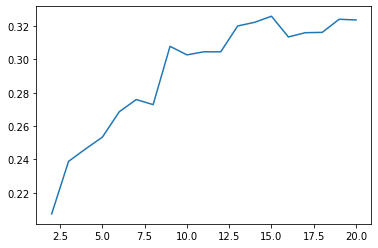

In [51]:
plt.plot(cohr.Topic_Count, cohr.Coherence);

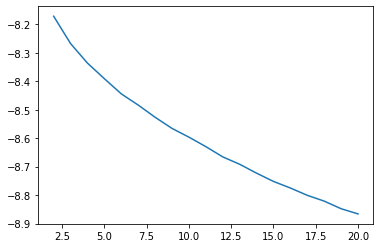

In [52]:
plt.plot(cohr.Topic_Count, cohr.Perplexity);

In [53]:
vis=gensimvis.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.013050 -0.068805       1        1  16.206288
2      0.016950 -0.012605       2        1  11.971791
6     -0.019681 -0.032082       3        1  11.701046
5      0.026960 -0.026155       4        1  10.342447
0      0.067496  0.031537       5        1   9.152224
9      0.024573 -0.038732       6        1   8.832997
1      0.011263  0.050244       7        1   8.635515
8      0.116289  0.071242       8        1   8.406298
7     -0.083824 -0.109443       9        1   7.734460
4     -0.146975  0.134799      10        1   7.016935, topic_info=         Term         Freq        Total Category  logprob  loglift
476       amp  1786.000000  1786.000000  Default  30.0000  30.0000
5         war  4235.000000  4235.000000  Default  29.0000  29.0000
769    cancel   302.000000   302.000000  Default  28.0000  28.0000
421     power   858.000000   858.000000  Default  27.0000  27.0000
146     biden  1698.000000  1698.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
56      world    64.581295  1258.828351  Topic10  -5.6501  -0.3132
302        go    65.140303  1508.547847  Topic10  -5.6414  -0.4855
428  vladimir    54.522877   472.126274  Topic10  -5.8194   0.4982
320      help    54.364714   632.274105  Topic10  -5.8223   0.2032
178       get    54.239816  1263.229835  Topic10  -5.8246  -0.4912

[857 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         8  0.972263      abduct
5210      1  0.027012    absolute
5210      6  0.756324    absolute
5210     10  0.189081    absolute
4860      4  0.921107  acceptance
...     ...       ...         ...
747       4  0.073206   zelenskyy
747       5  0.030503   zelenskyy
747       7  0.006101   zelenskyy
747       8  0.012201   zelenskyy
747       9  0.006101   zelenskyy

[2723 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 7, 6, 1, 10, 2, 9, 8, 5])

## Modelling Topics for Russia

### Data Cleaning Round 1

In [54]:
!pip install -U pip setuptools wheel

In [55]:
!pip install -U spacy

In [56]:
import spacy

In [57]:
! install ru_core_news_sm

install: missing destination file operand after 'ru_core_news_sm'
Try 'install --help' for more information.


In [58]:
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 33.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


In [59]:
nlp2=spacy.load('ru_core_news_sm')

/usr/local/lib/python3.7/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.7/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.7/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.7/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.g

In [60]:
before_cleaningRU = tweets_ru.copy()

In [61]:

'''Remove all links, all @s, convert to lower case, remove all hashtags'''

tweets_ru.tweet = tweets_ru.tweet.map(lambda x: re.sub(r"http\S+", '', x))\
.map(lambda x: re.sub(r"@\S+", '', x))\
.map(lambda x: x.lower())

tweets_ru['tweet'] = tweets_ru.apply(lambda x: [word for word in x['tweet'].split() if word not in x['hashtags']], axis =1)\
.map(lambda x: ' '.join(x))

tweets_ru = tweets_ru.drop(columns = ['hashtags'])


'''remove words containing numbers, remove words starting with underscore, and nonenglish characters'''

tweets_ru.tweet = tweets_ru.tweet.map(lambda word: re.sub('\w*\d\w*', '', word))\
.map(lambda word: re.sub(r"_\S+", '', word))

<input>:13: DeprecationWarning: invalid escape sequence \w
<ipython-input-61-41aa9816328b>:13: DeprecationWarning: invalid escape sequence \w
  tweets_ru.tweet = tweets_ru.tweet.map(lambda word: re.sub('\w*\d\w*', '', word)).map(lambda word: re.sub(r"_\S+", '', word))


In [62]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
tweets_ru.tweet = tweets_ru.tweet.map(lambda message: casual_tokenize(message, reduce_len=True, strip_handles=True))\
.map(lambda message: ' '.join(message))

In [64]:
tweets_ru.tweet

0        путин , в отличие от вас , это прекрасно поним...
1        президент должен наградить russia today медаль...
2                                        хорошая новость .
3        ваш лидер был на футбольном стадионе , битком ...
4        люди умирают у моих ровесников и меня нет буду...
                               ...                        
22902    " россия - это путин , путин - это россия " ( с )
22903    неважно , что вырвано из контекста , главное ,...
22904    автобус в москве со мной разговаривает . путин...
22905    теперь будет с путиным : сценарии от западных ...
22906    если у тебя сосед ( зеленский ) долбаёб не даё...
Name: tweet, Length: 22907, dtype: object

In [65]:
def lemmatizer(text):
    return ' '.join([word.lemma_ for word in nlp2(text)])

In [66]:
tweets_ru.tweet=tweets_ru.tweet.apply(lemmatizer)

In [67]:
for j in range(5):
    print('Before Cleaning:')
    print(before_cleaningRU.tweet[j])
    print(' ')
    print('After Cleaning:')
    print(tweets_ru.tweet[j])
    print(' ')


Before Cleaning:
@givemeatalk @max_katz Путин, в отличие от вас, это прекрасно понимает, поэтому никогда открыто не демонстрирует свой правый либерализм, а наоборот изображает борца с мировым империализмом. Поэтому всё так плохо и закончилось. И это было понятно уже в 1991 году. Капитализм здесь не приживётся.
 
After Cleaning:
путин , в отличие от вас , это прекрасно понимать , поэтому никогда открыто не демонстрировать свой правый либерализм , а наоборот изображать борец с мировой империализм . поэтому всё так плохой и закончиться . и это было понятный уже в год . капитализм здесь не приживётся .
 
Before Cleaning:
#Ukraine Президент @ZelenskyyUa   должен наградить Russia Today @MuradGazdiev  медалью за успешную разведывательную операцию, которая позволила нанести удар по российским военно-морским объектам в #Berdyansk порту.
 
After Cleaning:
президент должный наградить russia today медаль за успешный разведывательный операция , которая позволить нанести удар по российский военно - 

In [68]:
stop_wordsRU=stopwords.words('russian')
stop_wordsRU.extend(['putin', 'ukraine', 'russia', 'zelensky', 'russian', 'ukrainian'])

In [69]:
#count vectorizer of russian tweets
cvru=CountVectorizer(stop_words=stop_wordsRU,min_df=10)
dataCVru=cvru.fit_transform(tweets_ru.tweet)
dataCVru_df=pd.DataFrame(dataCVru.toarray(), columns=cvru.get_feature_names())

In [70]:
new_dfru=dataCVru_df.sum().sort_values(ascending=False)

In [71]:
top15=new_dfru[:15]

In [72]:
top15.index

Index(['путин', 'это', 'украина', 'россия', 'зеленский', 'весь', 'война',
       'свой', 'мочь', 'человек', 'президент', 'страна', 'говорить',
       'российский', 'год'],
      dtype='object')

In [73]:
top15.head(15)

путин         16243
это            5084
украина        3920
россия         3153
зеленский      2970
весь           2402
война          2067
свой           1867
мочь           1565
человек        1468
президент      1302
страна         1213
говорить       1176
российский     1127
год            1102
dtype: int64

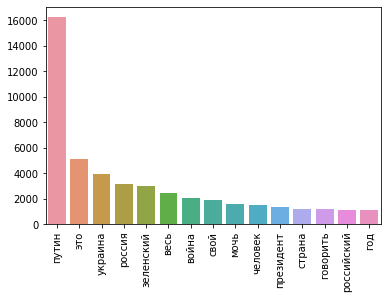

In [74]:
sns.barplot(y=top15.values, x=top15.index)
plt.xticks(rotation=90)
plt.show()

In [75]:
dataRU=tweets_ru.tweet.values.tolist()
tweet_wordRU=list(sent_to_words(dataRU))

In [76]:
def remove_stopwordsRU(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_wordsRU] for doc in texts]

In [77]:
tweet_wordRU=remove_stopwords(tweet_wordRU)

In [78]:
id2word=corpora.Dictionary(tweet_wordRU)

texts=tweet_wordRU

In [79]:
## create corpus

corpus=[id2word.doc2bow(text) for text in texts]

In [80]:
lda_model=gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=10, random_state=42)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [81]:
# get coherence for Russian Topics
cohr=get_coherence_and_perplexity(corpus, id2word, texts, 21,42)
cohr

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

Perplexity  Coherence  Topic_Count
0    -7.950042   0.457969            2
1    -8.019963   0.472046            3
2    -8.084834   0.469705            4
3    -8.107716   0.448278            5
4    -8.156101   0.463535            6
5    -8.204040   0.466124            7
6    -8.243361   0.460833            8
7    -8.277015   0.455723            9
8    -8.302509   0.470512           10
9    -8.344761   0.470222           11
10   -8.374281   0.475788           12
11   -8.401615   0.475041           13
12   -8.431004   0.483322           14
13   -8.458149   0.479472           15
14   -8.475540   0.485400           16
15   -8.502648   0.485824           17
16   -8.531285   0.478031           18
17   -8.553114   0.475879           19
18   -8.569504   0.479527           20

In [82]:
#def get_coherence_and_perplexity(corpus, id2word, texts, max_count,seed):

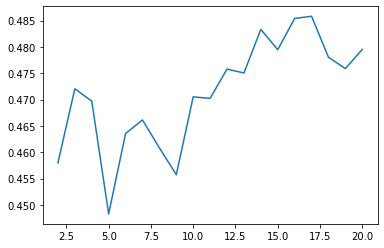

In [83]:
plt.plot(cohr.Topic_Count, cohr.Coherence);



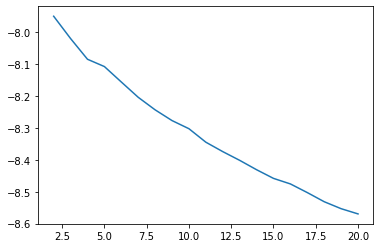

In [84]:
plt.plot(cohr.Topic_Count, cohr.Perplexity);

In [85]:
pprint(lda_model.print_topics())

[(0,
  '0.044*"путин" + 0.022*"россия" + 0.021*"украина" + 0.017*"на" + 0.014*"что" '
  '+ 0.012*"воина" + 0.010*"не" + 0.010*"президент" + 0.009*"за" + '
  '0.009*"это"'),
 (1,
  '0.064*"путин" + 0.018*"на" + 0.013*"за" + 0.012*"не" + 0.012*"что" + '
  '0.009*"владимир" + 0.009*"газ" + 0.008*"рубль" + 0.007*"хуило" + '
  '0.006*"по"'),
 (2,
  '0.028*"путин" + 0.018*"украина" + 0.013*"на" + 0.009*"россия" + '
  '0.009*"россиискии" + 0.008*"что" + 0.007*"не" + 0.007*"наш" + '
  '0.005*"зеленскии" + 0.004*"воина"'),
 (3,
  '0.036*"путин" + 0.013*"не" + 0.011*"как" + 0.011*"на" + 0.011*"за" + '
  '0.009*"это" + 0.008*"да" + 0.008*"что" + 0.006*"из" + 0.006*"весь"'),
 (4,
  '0.040*"что" + 0.033*"не" + 0.030*"путин" + 0.018*"это" + 0.013*"на" + '
  '0.011*"вы" + 0.011*"то" + 0.011*"как" + 0.009*"зеленскии" + 0.009*"весь"'),
 (5,
  '0.045*"путин" + 0.043*"не" + 0.025*"что" + 0.015*"ты" + 0.013*"это" + '
  '0.010*"на" + 0.009*"то" + 0.009*"умереть" + 0.007*"но" + 0.007*"вы"'),
 (6,
  '0.036*"

In [86]:
vis=gensimvis.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.075483 -0.030520       1        1  23.529627
6     -0.051118 -0.028687       2        1  13.715014
0      0.051127  0.047106       3        1  10.289508
5     -0.089447 -0.033633       4        1   9.688821
8     -0.046588 -0.006354       5        1   9.547159
9      0.014459  0.023599       6        1   7.290829
1      0.023104  0.145949       7        1   7.239957
7     -0.042559 -0.058297       8        1   7.211169
2      0.197994 -0.081245       9        1   5.769861
3      0.018509  0.022084      10        1   5.718055, topic_info=          Term          Freq         Total Category  logprob  loglift
26       путин  14719.000000  14719.000000  Default  30.0000  30.0000
120         он   2291.000000   2291.000000  Default  29.0000  29.0000
128    украина   3545.000000   3545.000000  Default  28.0000  28.0000
14          не   9859.000000   9859.000000  Default  27.0000  27.0000
160     россия   2968.000000   2968.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
33     должныи     63.906078    687.142685  Topic10  -5.8600   0.4864
71   зеленскии     79.652136   2900.408264  Topic10  -5.6398  -0.7334
84       воина     63.479813   1947.229031  Topic10  -5.8667  -0.5619
372     только     55.969510   1135.869078  Topic10  -5.9926  -0.1488
3          все     57.667849   1628.061239  Topic10  -5.9627  -0.4789

[861 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
6179       8  0.930224   facebook
6763       3  0.955412  financial
3044       6  0.924410        new
3045       6  0.959203       post
10321      3  0.941482     spirit
...      ...       ...        ...
2359       7  0.017136      ясныи
2359       8  0.034272      ясныи
2359      10  0.085681      ясныи
8261       2  0.056899      өөрөө
8261       4  0.910391      өөрөө

[2502 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 1, 6, 9, 10, 2, 8, 3, 4])

## Language Modelling Ukraine

In [87]:
import spacy

In [88]:
!python -m spacy download xx_ent_wiki_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 45.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('xx_ent_wiki_sm')


In [89]:
nlp3 = spacy.load("xx_ent_wiki_sm")

In [90]:
before_cleaningUK = tweets_uk.copy()

In [91]:

'''Remove all links, all @s, convert to lower case, remove all hashtags'''

tweets_uk.tweet = tweets_uk.tweet.map(lambda x: re.sub(r"http\S+", '', x))\
.map(lambda x: re.sub(r"@\S+", '', x))\
.map(lambda x: x.lower())

tweets_uk['tweet'] = tweets_uk.apply(lambda x: [word for word in x['tweet'].split() if word not in x['hashtags']], axis =1)\
.map(lambda x: ' '.join(x))

tweets_uk = tweets_uk.drop(columns = ['hashtags'])

'''remove words containing numbers, remove words starting with underscore, and nonenglish characters'''

tweets_uk.tweet = tweets_uk.tweet.map(lambda word: re.sub('\w*\d\w*', '', word))\
.map(lambda word: re.sub(r"_\S+", '', word))

<input>:12: DeprecationWarning: invalid escape sequence \w
<ipython-input-91-17e4f98a53b6>:12: DeprecationWarning: invalid escape sequence \w
  tweets_uk.tweet = tweets_uk.tweet.map(lambda word: re.sub('\w*\d\w*', '', word)).map(lambda word: re.sub(r"_\S+", '', word))


In [92]:
tweets_uk.tweet = tweets_uk.tweet.map(lambda message: casual_tokenize(message, reduce_len=True, strip_handles=True))\
.map(lambda message: ' '.join(message))

In [93]:
tweets_uk.tweet

0        коротко по украине . ... #донбасс , #войнанадо...
1        всі , хто кликав росію і путіна , ви чому сиди...
2                      ⚡ ️ месники : українська версія 🇺 🇦
3        після війни я обов ‘ язково … 💛 💙 обов ‘ язков...
4            захід повинен закрити небо над україною 💛 💙 🙏
                               ...                        
22902    українська війна : володимир зеленський бачить...
22903                російсько-білорусько-українська війна
22904    live українська війна : ядерна небезпека , дос...
22905    якщо це неправда , то вона в туреччині зі свої...
22906    якщо це неправда , то вона в туреччині зі свої...
Name: tweet, Length: 22907, dtype: object

In [94]:
#def lemmatizer(text):
  #  return ' '.join([word.lemma_ for word in nlp3(text)])

In [95]:
#tweets_uk.tweet=tweets_uk.tweet.apply(lemmatizer)

In [96]:
!pip install matplotlib-venn


In [97]:
!apt-get -qq install -y libfluidsynth1

In [98]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

In [99]:
tweets_uk.tweet

0        коротко по украине . ... #донбасс , #войнанадо...
1        всі , хто кликав росію і путіна , ви чому сиди...
2                      ⚡ ️ месники : українська версія 🇺 🇦
3        після війни я обов ‘ язково … 💛 💙 обов ‘ язков...
4            захід повинен закрити небо над україною 💛 💙 🙏
                               ...                        
22902    українська війна : володимир зеленський бачить...
22903                російсько-білорусько-українська війна
22904    live українська війна : ядерна небезпека , дос...
22905    якщо це неправда , то вона в туреччині зі свої...
22906    якщо це неправда , то вона в туреччині зі свої...
Name: tweet, Length: 22907, dtype: object

In [100]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [101]:
!pip install advertools

In [102]:
import advertools as adv
adv.stopwords.keys()

dict_keys(['arabic', 'azerbaijani', 'bengali', 'catalan', 'chinese', 'croatian', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hindi', 'hungarian', 'indonesian', 'irish', 'italian', 'japanese', 'kazakh', 'nepali', 'norwegian', 'persian', 'polish', 'portuguese', 'romanian', 'russian', 'sinhala', 'spanish', 'swedish', 'tagalog', 'tamil', 'tatar', 'telugu', 'thai', 'turkish', 'ukrainian', 'urdu', 'vietnamese'])

In [103]:
print(sorted(adv.stopwords['english'])[:5])

['a', 'about', 'above', 'across', 'after']


In [104]:
for j in range(5):
    print('Before Cleaning:')
    print(before_cleaningUK.tweet[j])
    print(' ')
    print('After Cleaning:')
    print(tweets_uk.tweet[j])
    print(' ')


Before Cleaning:
Коротко по Украине. 10.03.2022. #Донбасс, #войнанаДонбассе, #ДНР, #ЛНР, #Украина, #ВСУ, #Россия, #ВСРоссии, #ВКСРоссии, #российскоукраинскаявойна, #операцияZ, #russianukrainianwar,       https://t.co/MH8mra4Cdd
 
After Cleaning:
коротко по украине . ... #донбасс , #войнанадонбассе , #днр , #лнр , #украина , #всу , #россия , #всроссии , #вксроссии , #российскоукраинскаявойна , #операцияz , #russianukrainianwar ,
 
Before Cleaning:
Всі, хто кликав росію і путіна, ви чому сидите по підвалах? Виходьте,  суки до вас прийшли!!! #RussianUkrainianWar
 
After Cleaning:
всі , хто кликав росію і путіна , ви чому сидите по підвалах ? виходьте , суки до вас прийшли ! ! !
 
Before Cleaning:
⚡️Месники: українська версія🇺🇦  #StandWithUkraine #UkraineRussiaWar #RussianUkrainianWar #Ukraine #Україна #Украина  https://t.co/Gm7eioESRN
 
After Cleaning:
⚡ ️ месники : українська версія 🇺 🇦
 
Before Cleaning:
Після війни я обов‘язково… 💛💙 Обов‘язково повернусь в нашу домівку і зітхну з полег

In [105]:
stop_wordsUK=list(adv.stopwords['ukrainian'])
stop_wordsUK.extend(['putin', 'ukraine', 'russia', 'zelensky', 'russian', 'ukrainian'])

In [106]:
#cvuk

NameError: ignored

In [107]:
#count vectorizer of Ukraine tweets
cvuk=CountVectorizer(stop_words=stop_wordsUK,min_df=10)
dataCVuk=cvuk.fit_transform(tweets_uk.tweet)
dataCVuk_df=pd.DataFrame(dataCVuk.toarray(), columns=cvuk.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['дев', 'ятий', 'ятнадцятий', 'ятнадцять', 'ять', 'ім'] not in stop_words.
  % sorted(inconsistent)


In [108]:
new_dfuk=dataCVuk_df.sum().sort_values(ascending=False)

In [109]:
new_dfuk

путін         7369
зеленський    6861
україни       2022
україні       1524
то            1432
              ... 
реальності      10
відповіли       10
реальні         10
відправляє      10
разніца         10
Length: 4035, dtype: int64

In [110]:
top15=new_dfuk[:15]

In [111]:
top15.index

Index(['путін', 'зеленський', 'україни', 'україні', 'то', 'все', 'війна',
       'нато', 'президент', 'бо', 'україна', 'війни', 'володимир', 'росії',
       'всі'],
      dtype='object')

In [112]:
top15.head(15)

путін         7369
зеленський    6861
україни       2022
україні       1524
то            1432
все           1379
війна         1259
нато           965
президент      962
бо             953
україна        932
війни          894
володимир      868
росії          867
всі            839
dtype: int64

In [113]:
tweets_uk

tweet
0      коротко по украине . ... #донбасс , #войнанадо...
1      всі , хто кликав росію і путіна , ви чому сиди...
2                    ⚡ ️ месники : українська версія 🇺 🇦
3      після війни я обов ‘ язково … 💛 💙 обов ‘ язков...
4          захід повинен закрити небо над україною 💛 💙 🙏
...                                                  ...
22902  українська війна : володимир зеленський бачить...
22903              російсько-білорусько-українська війна
22904  live українська війна : ядерна небезпека , дос...
22905  якщо це неправда , то вона в туреччині зі свої...
22906  якщо це неправда , то вона в туреччині зі свої...

[22907 rows x 1 columns]

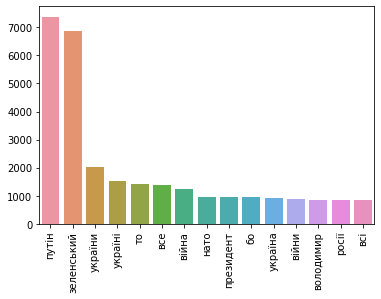

In [114]:
sns.barplot(y=top15.values, x=top15.index)
plt.xticks(rotation=90)
plt.show()

In [115]:
dataUK=tweets_uk.tweet.values.tolist()
tweet_wordUK=list(sent_to_words(dataUK))

In [116]:
def remove_stopwordsUK(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_wordsUK] for doc in texts]

In [117]:
tweet_wordUK=remove_stopwords(stop_wordsUK)

In [118]:
id2word=corpora.Dictionary(tweet_wordUK)

texts=tweet_wordUK

2022-05-16 12:27:49,464 | INFO | dictionary.py:199 | add_documents | adding document #0 to Dictionary(0 unique tokens: [])
2022-05-16 12:27:49,472 | INFO | dictionary.py:206 | add_documents | built Dictionary(380 unique tokens: ['численний', 'безперервно', 'він', 'теж', 'низько']...) from 397 documents (total 387 corpus positions)


In [119]:
cvuk=CountVectorizer(stop_words=stop_wordsUK,min_df=10)


In [ ]:
#dataCVuk=cvuk.fit_transform(tweets_uk.tweet)
#dataCVuk_df=pd.DataFrame(dataCVuk.toarray(), columns=cvuk.get_feature_names())

In [120]:
## create corpus

corpus=[id2word.doc2bow(text) for text in texts]

In [121]:
lda_model=gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=5, random_state=42)

2022-05-16 12:28:06,851 | INFO | ldamodel.py:553 | init_dir_prior | using symmetric alpha at 0.2
2022-05-16 12:28:06,854 | INFO | ldamodel.py:553 | init_dir_prior | using symmetric eta at 0.2
2022-05-16 12:28:06,858 | INFO | ldamodel.py:477 | __init__ | using serial LDA version on this node
2022-05-16 12:28:06,862 | INFO | ldamulticore.py:237 | update | running online LDA training, 5 topics, 1 passes over the supplied corpus of 397 documents, updating every 2000 documents, evaluating every ~397 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-16 12:28:06,868 | WARNING | ldamulticore.py:242 | update | too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-05-16 12:28:06,875 | INFO | ldamulticore.py:255 | update | training LDA model using 1 processes
2022-05-16 12:28:07,011 | INFO | ldamulticore.py:294 | update | PROGRESS: pass 0, dispatched chunk #0 = documents up to #397/397, outstanding que

In [122]:
pprint(lda_model.print_topics())

2022-05-16 12:28:16,856 | INFO | ldamodel.py:1152 | show_topics | topic #0 (0.200): 0.008*"те" + 0.008*"тим" + 0.008*"мільйонів" + 0.008*"мало" + 0.008*"важливі" + 0.008*"кому" + 0.008*"треба" + 0.008*"навіщо" + 0.008*"чим" + 0.008*"проте"
2022-05-16 12:28:16,861 | INFO | ldamodel.py:1152 | show_topics | topic #1 (0.200): 0.007*"дев" + 0.007*"ятнадцятий" + 0.007*"усього" + 0.007*"він" + 0.007*"зазвичай" + 0.007*"яких" + 0.007*"інший" + 0.007*"можуть" + 0.007*"завжди" + 0.007*"справ"
2022-05-16 12:28:16,865 | INFO | ldamodel.py:1152 | show_topics | topic #2 (0.200): 0.014*"дев" + 0.014*"ятнадцять" + 0.014*"ять" + 0.007*"крейдуючи" + 0.007*"яка" + 0.007*"наші" + 0.007*"сказав" + 0.007*"рано" + 0.007*"зайнятий" + 0.007*"багато"
2022-05-16 12:28:16,869 | INFO | ldamodel.py:1152 | show_topics | topic #3 (0.200): 0.008*"потрібно" + 0.008*"могти" + 0.008*"інші" + 0.008*"було" + 0.008*"ваші" + 0.008*"ким" + 0.008*"тепер" + 0.008*"кожні" + 0.008*"досить" + 0.008*"тобі"
2022-05-16 12:28:16,875 |

[(0,
  '0.008*"те" + 0.008*"тим" + 0.008*"мільйонів" + 0.008*"мало" + '
  '0.008*"важливі" + 0.008*"кому" + 0.008*"треба" + 0.008*"навіщо" + '
  '0.008*"чим" + 0.008*"проте"'),
 (1,
  '0.007*"дев" + 0.007*"ятнадцятий" + 0.007*"усього" + 0.007*"він" + '
  '0.007*"зазвичай" + 0.007*"яких" + 0.007*"інший" + 0.007*"можуть" + '
  '0.007*"завжди" + 0.007*"справ"'),
 (2,
  '0.014*"дев" + 0.014*"ятнадцять" + 0.014*"ять" + 0.007*"крейдуючи" + '
  '0.007*"яка" + 0.007*"наші" + 0.007*"сказав" + 0.007*"рано" + '
  '0.007*"зайнятий" + 0.007*"багато"'),
 (3,
  '0.008*"потрібно" + 0.008*"могти" + 0.008*"інші" + 0.008*"було" + '
  '0.008*"ваші" + 0.008*"ким" + 0.008*"тепер" + 0.008*"кожні" + 0.008*"досить" '
  '+ 0.008*"тобі"'),
 (4,
  '0.008*"ятий" + 0.008*"дев" + 0.008*"зайнято" + 0.008*"тільки" + '
  '0.008*"скільки" + 0.008*"хто" + 0.008*"ці" + 0.008*"там" + 0.008*"хочеш" + '
  '0.008*"мати"')]


In [123]:
cohr=get_coherence_and_perplexity(corpus, id2word, texts, 21,42)
cohr

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

Perplexity  Coherence  Topic_Count
0    -7.109916   0.852143            2
1    -7.481374   0.848943            3
2    -7.702070   0.844519            4
3    -7.919557   0.843523            5
4    -8.090290   0.840729            6
5    -8.255394   0.838600            7
6    -8.376196   0.837470            8
7    -8.478451   0.834684            9
8    -8.599239   0.832489           10
9    -8.696603   0.830993           11
10   -8.779587   0.829107           12
11   -8.848537   0.827354           13
12   -8.929999   0.825542           14
13   -9.001434   0.823820           15
14   -9.060249   0.822782           16
15   -9.129318   0.821343           17
16   -9.188913   0.822028           18
17   -9.224187   0.821387           19
18   -9.299700   0.820756           20

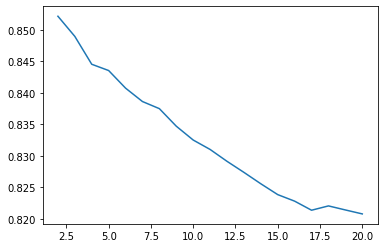

In [124]:
plt.plot(cohr.Topic_Count, cohr.Coherence);

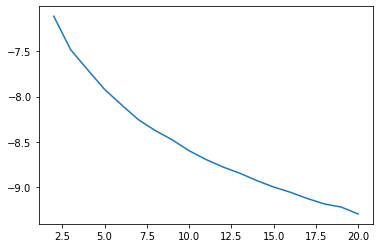

In [125]:
plt.plot(cohr.Topic_Count, cohr.Perplexity);

In [126]:
vis=gensimvis.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.109691  0.043388       1        1  21.642789
2     -0.083916  0.078512       2        1  20.700178
4     -0.016659 -0.099562       3        1  20.481806
0     -0.009557 -0.018032       4        1  18.717270
3      0.000441 -0.004306       5        1  18.457957, topic_info=           Term      Freq     Total Category  logprob  loglift
190   ятнадцять  1.000000  1.000000  Default  30.0000  30.0000
269         ять  1.000000  1.000000  Default  29.0000  29.0000
14          дев  2.000000  2.000000  Default  28.0000  28.0000
15   ятнадцятий  1.000000  1.000000  Default  27.0000  27.0000
303    потрібно  1.000000  1.000000  Default  26.0000  26.0000
..          ...       ...       ...      ...      ...      ...
376      раніше  0.591007  1.007894   Topic5  -4.7947   1.1559
53       сьомий  0.590993  1.007885   Topic5  -4.7947   1.1559
173         том  0.590981  1.007891   Topic5  -4.7947   1.1558
271      третій  0.590926  1.007886   Topic5  -4.7948   1.1558
274      другий  0.590856  1.007885   Topic5  -4.7949   1.1556

[185 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
361       1  0.989814     або
329       1  0.989808     але
111       2  0.989700  багато
356       3  0.990344     без
272       1  0.989811   буває
...     ...       ...     ...
133       1  0.989809   інший
242       5  0.992189    інші
41        4  0.993567      їй
365       3  0.990339      їх
174       5  0.992176      її

[157 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 1, 4])

In [ ]:
!npm install stopwords-uk